In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('/Users/jacobcastiglioni/Desktop/machine-learning-ex2/ex2/ex2data1.txt', header=None)
data = data.as_matrix()

In [3]:
data = np.array([[3,  1.5, 1], 
         [2,  1,   0], 
         [4,  1.5, 1], 
         [2.5,  1, 0],
         [3.5,0.5, 1],
         [2,  0.5, 0],
         [5.5,1,   1],
         [1,  1,   0]])

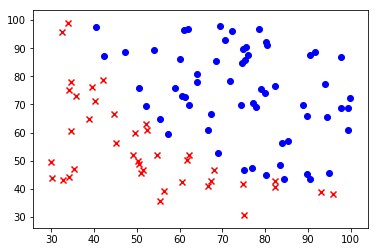

In [4]:
for i in range(len(data)):
    point = data[i]
    marker = 'x'
    color = 'r'
    if point[2] == 1:
        marker = 'o'
        color = 'b'
    plt.scatter(point[0], point[1], c = color, marker = marker)

In [5]:
def sigmoid(x, der=False):
    if der==True:
        return sigmoid(x) * (1-sigmoid(x))
    return 1/(1+np.exp(-x))

In [6]:
#regularlized X
X = (data[:,0:2] - np.mean(data[:,0:2]))/np.std(data[:,0:2])
y = data[:,2:3]

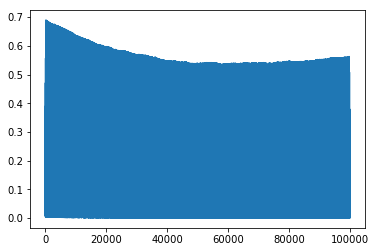

In [29]:
theta = np.random.random((1,2))
b = 1 #np.random.rand()
alpha = 0.0004
costs = []

for i in range(100000):
    ri = np.random.randint(len(X))
    m = X[ri]
    m = m.reshape(1, len(m))
    z = m.dot(theta.T) + b
    
    hypo = sigmoid(z)
    cost = np.square(hypo-y[ri])
    
    #if i % 10 == 0:
    costs.append(np.asscalar(cost))
    
    dcost_dhypo = 2 * (hypo-y[ri])
    dpred_dz = sigmoid(z, True)
    
    dz_dtheta = m
    dz_db = 1
    
    dcost_dz = dcost_dhypo * dpred_dz
    dcost_dtheta = dcost_dz * dz_dtheta
    dcost_db = dcost_dz * dz_db
    
    theta = theta - (alpha*dcost_dtheta)
    b = b - (alpha*dcost_db)
    
plt.plot(costs)